<a href="https://colab.research.google.com/github/arnab-mkj/Time_Series/blob/main/Time_series_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [ ]:
def trend(time, slope=0):
  return slope * time

In [ ]:
time = np.arange(4 * 365 + 1)
print(time)

[   0    1    2 ... 1458 1459 1460]


In [ ]:
baseline = 10
series = trend(time, 0.1)
print(series)

[0.000e+00 1.000e-01 2.000e-01 ... 1.458e+02 1.459e+02 1.460e+02]


In [ ]:
def plot_series(time, series, format="-", start=0, end=None, label=None):
    plt.plot(time[start:end], series[start:end], format, label=label)
    plt.xlabel("Time")
    plt.ylabel("Value")
    if label:
        plt.legend(fontsize=14)
    plt.grid(True)

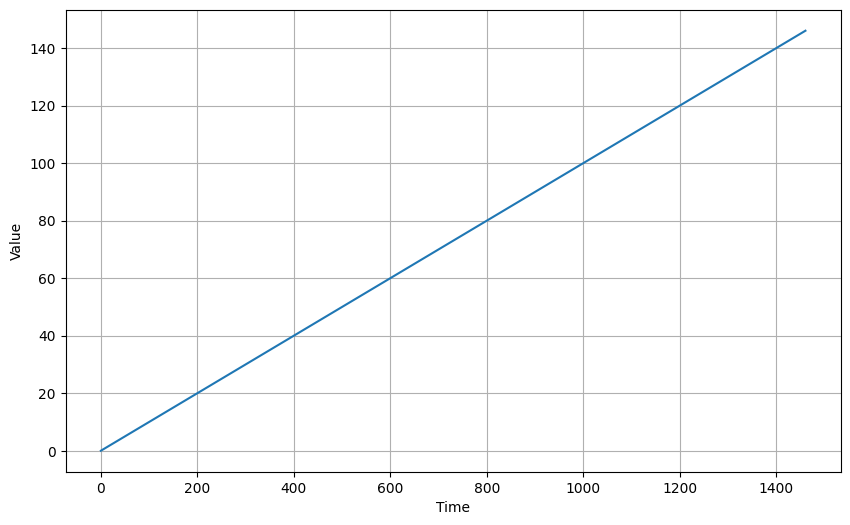

In [ ]:
plt.figure(figsize=(10, 6))
plot_series(time, series)
plt.show()

In [ ]:
def seasonal_pattern(season_time):
  """Arbitrary pattern"""
  return np.where(season_time < 0.4,
                  np.cos(season_time * 2 * np.pi),
                  1 / np.exp(3 * season_time))

def seasonality(time, period, amplitude=1, phase=0):
  """Repeats the same pattern at each period"""
  season_time = ((time + phase) % period) / period
  return amplitude * seasonal_pattern(season_time)

In [ ]:
baseline = 10
amplitude = 40
series = seasonality(time, period = 365, amplitude=amplitude)

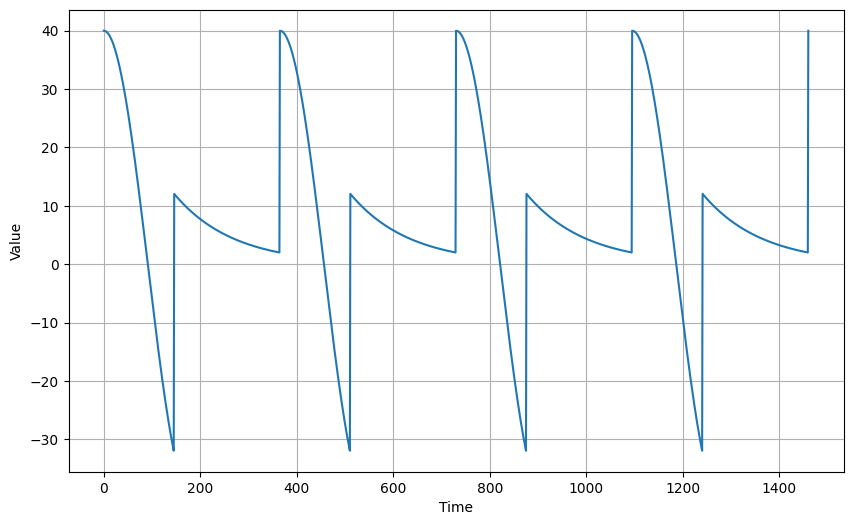

In [ ]:
plt.figure(figsize=(10,6))
plot_series(time, series)
plt.show()

In [ ]:
slope = 0.05
baseline = 10
series = baseline + trend(time, slope) + seasonality(time, period = 365, amplitude=amplitude)

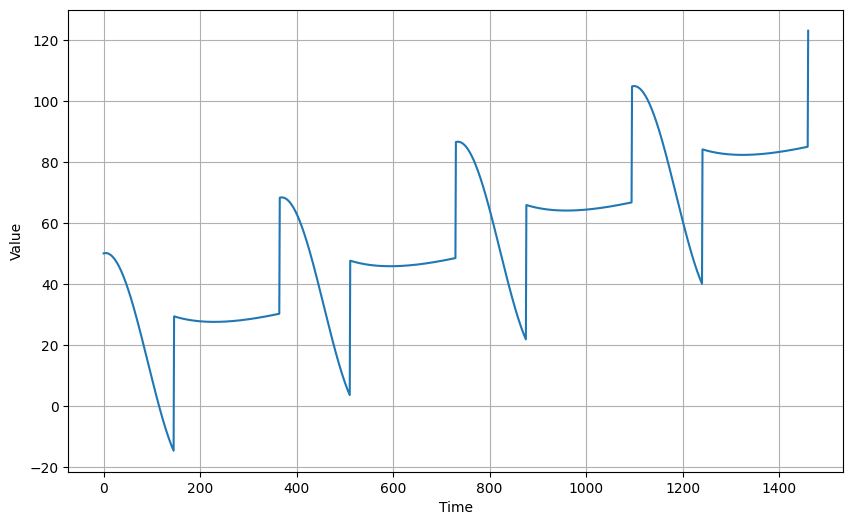

In [ ]:
plt.figure(figsize=(10,6))
plot_series(time, series)
plt.show()

In [ ]:
def white_noise(time, noise_level=1, seed=None):
  rnd = np.random.RandomState(seed)
  return rnd.randn(len(time)) * noise_level

In [ ]:
noise_level = 5
noise = white_noise(time, noise_level, seed=42)

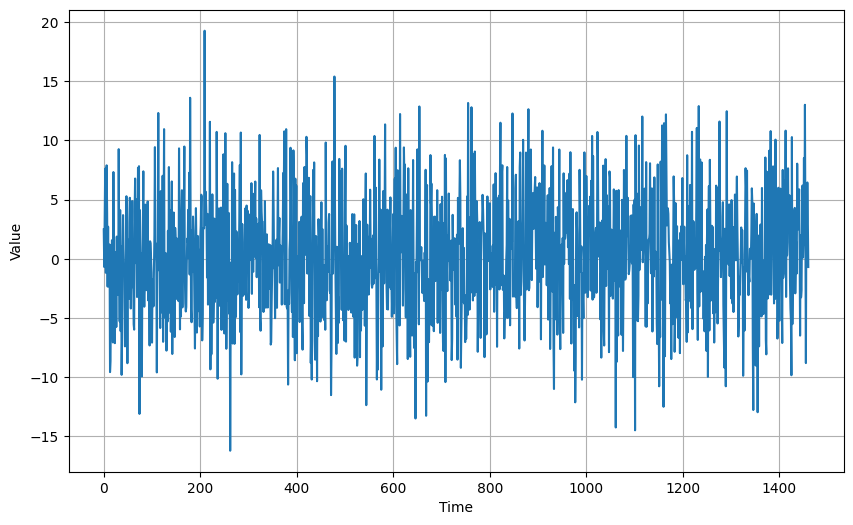

In [ ]:
plt.figure(figsize=(10,6))
plot_series(time, noise)
plt.show()

In [ ]:
# Create the series
series = baseline + trend(time, slope) + seasonality(time, period=365, amplitude = amplitude)

# update with noise
series += noise

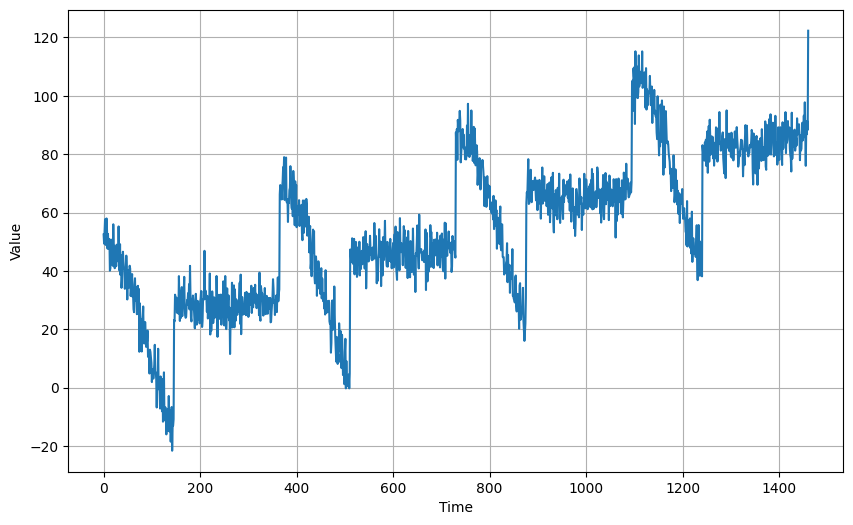

In [ ]:
plt.figure(figsize=(10,6))
plot_series(time, series)
plt.show()

In [ ]:
split_time = 1000
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]

In [ ]:
naive_forecast = series[split_time - 1:-1]
#In simpler terms, this naive forecast is simply assuming that the future values
#will be the same as the previous value


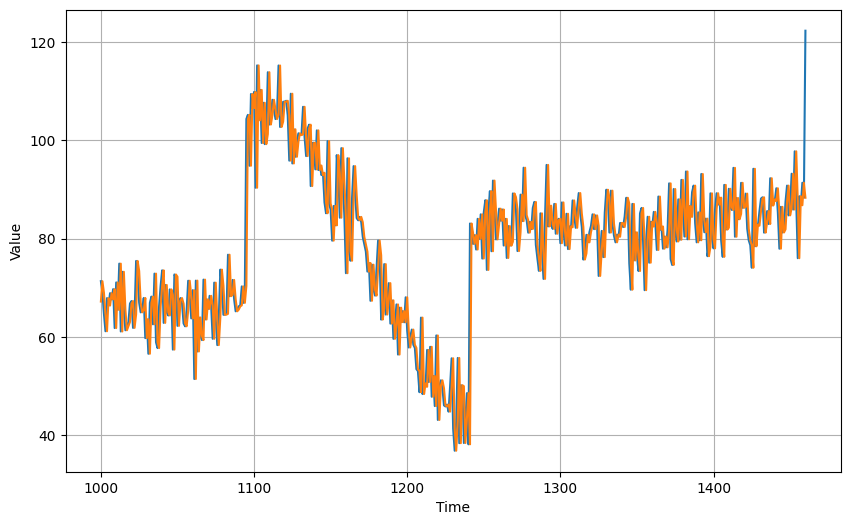

In [ ]:
plt.figure(figsize=(10,6))
plot_series(time_valid, x_valid)
plot_series(time_valid, naive_forecast)
plt.show()

In [ ]:
# Assuming x_valid and naive_forecast are numpy arrays or tensors
mse_metric = keras.metrics.MeanSquaredError()
mae_metric = keras.metrics.MeanAbsoluteError()

# Update the metrics with the true values and predictions
mse_metric.update_state(x_valid, naive_forecast)
mae_metric.update_state(x_valid, naive_forecast)

# Get the results
mse = mse_metric.result().numpy()
mae = mae_metric.result().numpy()

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

Mean Squared Error: 61.827534
Mean Absolute Error: 5.9379086


In [ ]:
def moving_average_forecast(series, window_size):
  """Forecasts the mean of the last few values.
  If the window_size=1, then this is equivalent to naive forecast"""
  forecast = []

  for time in range(len(series) - window_size):
    forecast.append(series[time:time + window_size].mean())
  return np.array(forecast)


moving_avg = moving_average_forecast(series, 30)[split_time - 30:]

In [ ]:
# Assuming x_valid and naive_forecast are numpy arrays or tensors
mse_metric = keras.metrics.MeanSquaredError()
mae_metric = keras.metrics.MeanAbsoluteError()

# Update the metrics with the true values and predictions
mse_metric.update_state(x_valid, moving_avg)
mae_metric.update_state(x_valid, moving_avg)

# Get the results
mse = mse_metric.result().numpy()
mae = mae_metric.result().numpy()

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

Mean Squared Error: 106.67457
Mean Absolute Error: 7.1424184


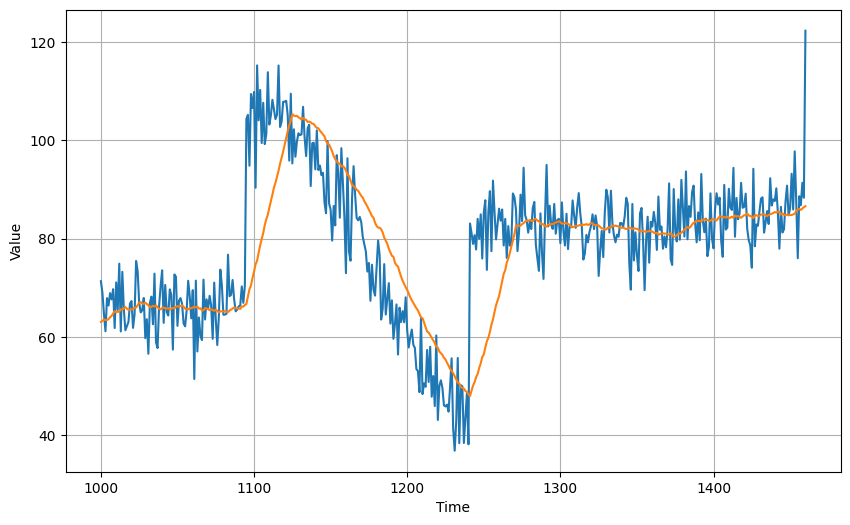

In [ ]:
plt.figure(figsize=(10,6))
plot_series(time_valid, series[split_time:])
plot_series(time_valid, moving_avg)
plt.show()

In [ ]:
diff_series = (series[365:] - series[:-365])
# stores the difference between each element in the series and the element 365 positions
diff_time = time[365:]

In [ ]:
diff_moving_avg = moving_average_forecast(diff_series, 50)[split_time - 365 -50:]

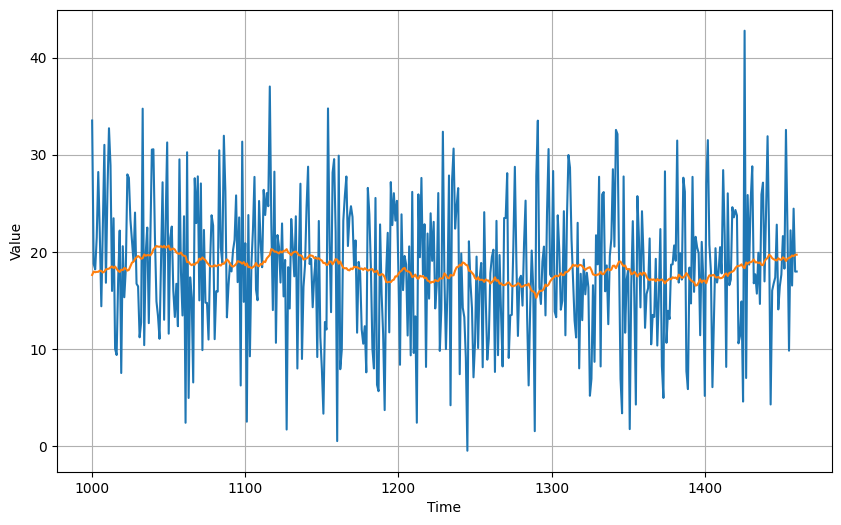

In [ ]:
plt.figure(figsize=(10, 6))
plot_series(time_valid, diff_series[split_time - 365:])  # Align diff_series with time_valid
plot_series(time_valid, diff_moving_avg)
plt.show()

In [ ]:
diff_moving_avg_plus_past = series[split_time - 365:-365]+ diff_moving_avg

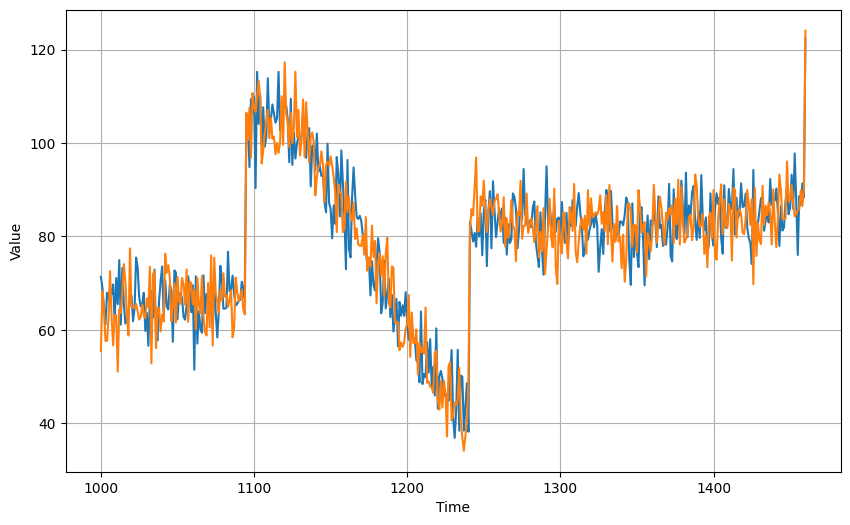

In [ ]:
plt.figure(figsize=(10, 6))
plot_series(time_valid, series[split_time:])  # Align diff_series with time_valid
plot_series(time_valid, diff_moving_avg_plus_past)
plt.show()

In [ ]:
diff_moving_avg_plus_smooth_past = moving_average_forecast(series[split_time - 370:-360], 10) + diff_moving_avg

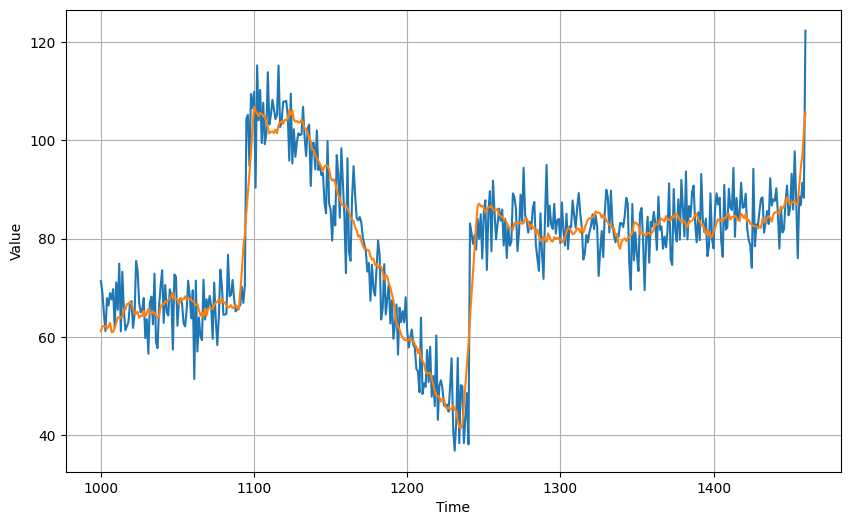

In [ ]:
plt.figure(figsize=(10, 6))
plot_series(time_valid, series[split_time:])  # Align diff_series with time_valid
plot_series(time_valid, diff_moving_avg_plus_smooth_past)
plt.show()

In [ ]:
dataset = tf.data.Dataset.range(10)
for val in dataset:
  print(val.numpy())

0
1
2
3
4
5
6
7
8
9


In [ ]:
dataset = tf.data.Dataset.range(10)
dataset = dataset.window(5, shift = 1)
for window_dataset in dataset:
  for val in window_dataset:
    print(val.numpy(), end=" ")
  print()

0 1 2 3 4 
1 2 3 4 5 
2 3 4 5 6 
3 4 5 6 7 
4 5 6 7 8 
5 6 7 8 9 
6 7 8 9 
7 8 9 
8 9 
9 


In [ ]:
dataset = tf.data.Dataset.range(10)
dataset = dataset.window(5, shift = 1, drop_remainder=True)
for window_dataset in dataset:
  for val in window_dataset:
    print(val.numpy(), end=" ")
  print()

0 1 2 3 4 
1 2 3 4 5 
2 3 4 5 6 
3 4 5 6 7 
4 5 6 7 8 
5 6 7 8 9 


In [ ]:
dataset = tf.data.Dataset.range(10)
dataset = dataset.window(5, shift = 1, drop_remainder=True)
dataset = dataset.flat_map(lambda window: window.batch(5))
for window in dataset:
  print(window.numpy())

[0 1 2 3 4]
[1 2 3 4 5]
[2 3 4 5 6]
[3 4 5 6 7]
[4 5 6 7 8]
[5 6 7 8 9]


In [ ]:
dataset = tf.data.Dataset.range(10)
dataset = dataset.window(5, shift = 1, drop_remainder=True)
dataset = dataset.flat_map(lambda window: window.batch(5))
dataset = dataset.map(lambda window: (window[:-1], window[-1:]))
for x,y in dataset:
  print(x.numpy(), y.numpy())

[0 1 2 3] [4]
[1 2 3 4] [5]
[2 3 4 5] [6]
[3 4 5 6] [7]
[4 5 6 7] [8]
[5 6 7 8] [9]


In [ ]:
dataset = tf.data.Dataset.range(10)
dataset = dataset.window(5, shift = 1, drop_remainder=True)
dataset = dataset.flat_map(lambda window: window.batch(5))
dataset = dataset.map(lambda window: (window[:-1], window[-1:]))
dataset = dataset.shuffle(buffer_size=10)
for x,y in dataset:
  print(x.numpy(), y.numpy())

[3 4 5 6] [7]
[5 6 7 8] [9]
[0 1 2 3] [4]
[1 2 3 4] [5]
[4 5 6 7] [8]
[2 3 4 5] [6]


In [ ]:
dataset = tf.data.Dataset.range(10)
dataset = dataset.window(5, shift = 1, drop_remainder=True)
dataset = dataset.flat_map(lambda window: window.batch(5))
dataset = dataset.map(lambda window: (window[:-1], window[-1:]))
dataset = dataset.shuffle(buffer_size=10)
dataset = dataset.batch(2).prefetch(1)
for x,y in dataset:
  print(x.numpy(), y.numpy())

[[5 6 7 8]
 [4 5 6 7]] [[9]
 [8]]
[[2 3 4 5]
 [0 1 2 3]] [[6]
 [4]]
[[1 2 3 4]
 [3 4 5 6]] [[5]
 [7]]


In [ ]:
time = np.arange(4* 365 + 1, dtype="float32")
baseline = 10
series = trend(time, 0.1)
baseline = 10
amplitude = 40
slope = 0.05
noise_level = 5

In [ ]:
# Create the series
series = baseline + trend(time, slope) + seasonality(time, period=365, amplitude = amplitude)

# update with noise
series += noise

In [ ]:
split_time = 1000
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]

Window size determines how much historical data is used to make a single prediction.
Batch size determines how many windows of data are used at once during training.

In [ ]:
window_size = 20
batch_size = 32
shuffle_buffer_size = 1000

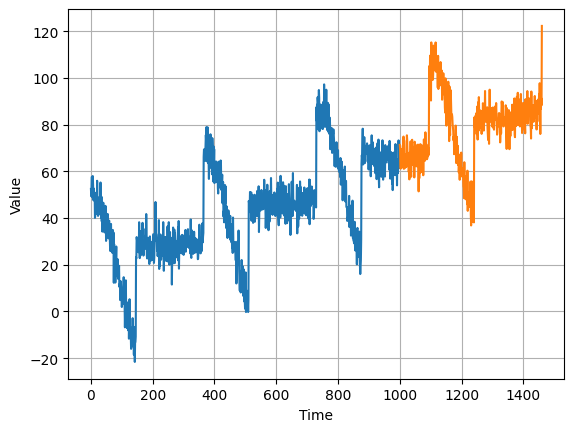

In [ ]:
plot_series(time_train, x_train)
plot_series(time_valid, x_valid)

In [ ]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
  dataset = tf.data.Dataset.from_tensor_slices(series) #This line takes the input series (your time series data) and converts it into a TensorFlow Dataset object
  dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True) # It creates a dataset of overlapping windows, where each window has a size of window_size + 1.
  dataset = dataset.flat_map(lambda window: window.batch(window_size + 1)) #his line takes the dataset of windows and groups them into batches. This batching helps make training the model more efficient.
  dataset = dataset.shuffle(shuffle_buffer).map(lambda window: (window[:-1], window[-1]))
  #map : Applies a function to each element of the dataset and replaces the element with the function's output.
  #to transform each batch (which represents a window) into an input/output pair: (window[:-1], window[-1]).
  dataset = dataset.batch(batch_size).prefetch(1) #Groups the (input, output) pairs into batches of size batch_size. This makes training more efficient.
   #prefetch(1): Prepares the next batch of data while the model is training on the current batch. This helps speed up training by minimizing waiting time.
  return dataset

In [ ]:
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)
print(dataset)

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, None), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.float32, name=None))>


**tf.keras.layers.Dense**: This is a function that creates a densely connected neural network layer. Think of it as a layer of interconnected nodes where each node receives input from all the nodes in the previous layer.
1: This argument specifies that the Dense layer will have one output neuron.
**input_shape=[window_size]**: This defines the shape of the input that this layer expects. It's saying that the input will be a sequence of length window_size.

In [ ]:
l0 = tf.keras.layers.Dense(1, input_shape=[window_size])
model = tf.keras.models.Sequential([l0])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(loss="mse", optimizer=tf.keras.optimizers.SGD(learning_rate=1e-6, momentum=0.9), metrics=['accuracy'])
model.fit(dataset,epochs=50,verbose=1)

Epoch 1/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0000e+00 - loss: 2107.5920
Epoch 2/50
24/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 436.6945  

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:151: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 425.5996
Epoch 3/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 266.4010
Epoch 4/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 250.5473
Epoch 5/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 174.7106
Epoch 6/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 147.9496
Epoch 7/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 144.4771
Epoch 8/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 148.3943
Epoch 9/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 132.5656
Epoch 10/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 123.1171
Epoch 11/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 102.7206
Epoch 12/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 102.2488
Epoch 13/50
31/31 

In [ ]:
print("Layer weights {}".format(l0.get_weights()))
#, this line of code is used to inspect the learned weights of your neural network layer l0 after training

Layer weights [array([[-0.05180988],
       [-0.20955606],
       [ 0.04746416],
       [ 0.10270732],
       [ 0.1101903 ],
       [ 0.08711403],
       [ 0.03673323],
       [-0.08372527],
       [ 0.09715836],
       [-0.0702189 ],
       [-0.10940883],
       [-0.09785256],
       [-0.13632256],
       [ 0.32320693],
       [-0.1227345 ],
       [ 0.01981541],
       [ 0.32995903],
       [ 0.224252  ],
       [ 0.13474493],
       [ 0.3323933 ]], dtype=float32), array([0.01260416], dtype=float32)]


In [ ]:
forecast = []
for time in range(len(series)-window_size):
  forecast.append(model.predict(series[time:time + window_size][np.newaxis]))

forecast = forecast[split_time - window_size:]
results = np.array(forecast)[:, 0, 0]
# this code takes the time series data, slides a window across it, uses the trained model to predict the
#next value for each window, and then organizes the predictions for the validation set into a final result.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━

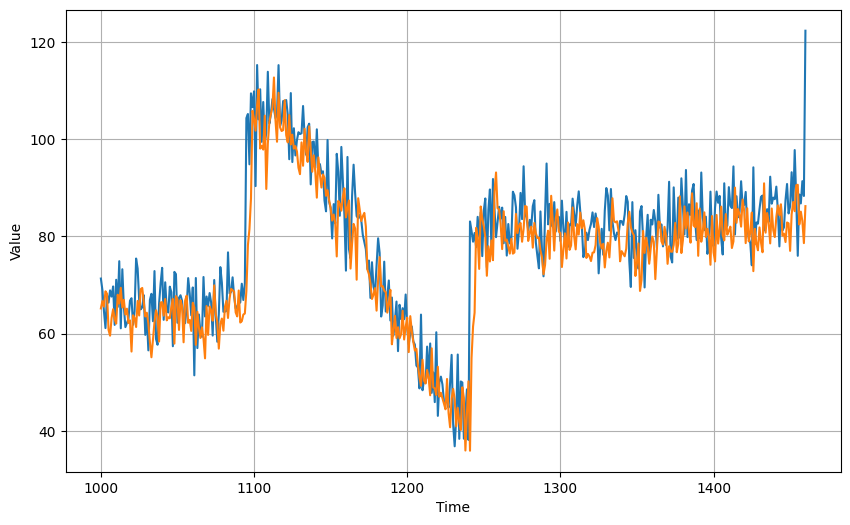

In [ ]:
plt.figure(figsize=(10,6))
plot_series(time_valid, x_valid)
plot_series(time_valid, results)

In [ ]:
tf.keras.metrics.MeanAbsoluteError(x_valid, results).numpy()

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, input_shape=[window_size], activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-6, momentum=0.9)
model.compile(loss="mse", optimizer = optimizer)
model.fit(dataset, epochs=100, verbose=1)

Epoch 1/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 2396.9373
Epoch 2/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 917.9252 
Epoch 3/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 134.5417
Epoch 4/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 116.6750
Epoch 5/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 120.1628
Epoch 6/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 86.0096
Epoch 7/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 85.5012
Epoch 8/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 69.4789
Epoch 9/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 78.1967
Epoch 10/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 73.1604
Epoch 11/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 72.1500
Epoch 12/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 73.7482
Epoch 13/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 66.2416
Epoch 14/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 64.8105
Epoch 15/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/ste

In [ ]:
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, input_shape=[window_size], activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1)
])

In [ ]:
lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-8 * 10 **(epoch//20))


In [ ]:
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-8, momentum=0.9)
model.compile(loss="mse", optimizer=optimizer)

history = model.fit(dataset, epochs=100, callbacks=[lr_schedule], verbose=1)

Epoch 1/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2658.0955 - learning_rate: 1.0000e-08
Epoch 2/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2357.8765 - learning_rate: 1.0000e-08
Epoch 3/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2314.0786 - learning_rate: 1.0000e-08
Epoch 4/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2074.8657 - learning_rate: 1.0000e-08
Epoch 5/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2093.2761 - learning_rate: 1.0000e-08
Epoch 6/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2068.7444 - learning_rate: 1.0000e-08
Epoch 7/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2032.0441 - learning_rate: 1.0000e-08
Epoch 8/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2042.5292 - learning_rate: 1.0000e-08
Epoch 9/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1925.9343 - learning_rate: 1.0000e-08
Epoch 10/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1902.7909 - learning_rate: 1.0000e-08
Epoch 11/100
31/31 ━━━━━━━━━━

(1e-08, 0.001, 0.0, 300.0)

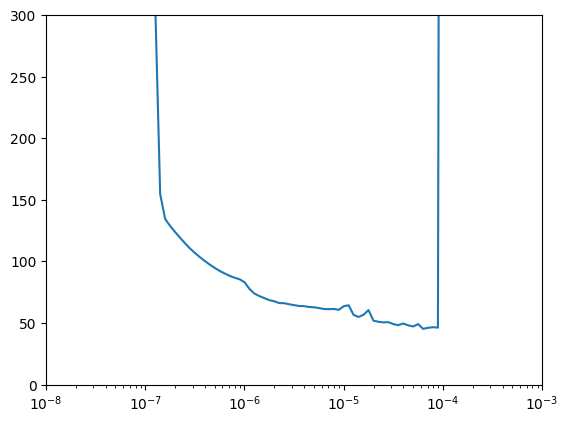

In [ ]:
lrs = 1e-8 * (10 ** (np.arange(100) / 20))
plt.semilogx(lrs, history.history["loss"])
plt.axis([1e-8, 1e-3, 0, 300])